1. 모델 적용 전 이상치 제거 하지말고 전후 비교
    - 나이대별 eda
    - 이상치 제거
    - smote적용 (오버샘플링 / 다운샘플링)
    - 기타 방법
2. 상관계수는 EDA 살펴보고 머신러닝에 적용하지말기
3.  데이터 불균형성 해소(오버샘플링)
4.  precision 매우 낮음(라벨1데이터를 오버샘플링 적용해보기)/ 다운샘플링 

*테스트 데이터는 오버샘플링 하면 안됨

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# 모델
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso, Ridge

# 모델 평가

from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             roc_auc_score, roc_curve,
                             confusion_matrix,
                             auc, precision_recall_curve,
                             accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score)

from sklearn.model_selection import learning_curve

import time
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv('./CVD_cleaned.csv')
df.head(3)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0


### Encoding

In [8]:
df_encoded = df.copy()

In [9]:
label_encoder = LabelEncoder()

for column in df_encoded.select_dtypes(include='object') :
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

df_encoded.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,2,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,0,2,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,3,4,1,1,0,0,0,2,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,4,0,0,0,0,0,0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


0 - NO

1 - YES

### split

In [10]:
X = df_encoded.drop("Heart_Disease", axis = 1) 
y = df_encoded['Heart_Disease']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df.info() #308854

In [15]:
len(X_train) #8

247083

In [17]:
len(X_test) #2

61771

In [18]:
len(y_train) #8

247083

In [19]:
len(y_test) #8

61771

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### scaler

- 이상치나 데이터의 분포가 한쪽으로 치우친 경우 min-mix scale은 값의 왜곡을 초래함 -> Robust scaler 적용

In [13]:
scaler = RobustScaler()

In [14]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
lr_clf = LogisticRegression(random_state=13)
lr_clf.fit(X_train, y_train)

y_pred_tr = lr_clf.predict(X_train)
y_pred_test = lr_clf.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.9185536843894562
Test Acc :  0.9189911123342669


In [15]:
# test 0.3
lr_clf = LogisticRegression(random_state=13)
lr_clf.fit(X_train, y_train)

y_pred_tr = lr_clf.predict(X_train)
y_pred_test = lr_clf.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.9190506806292409
Test Acc :  0.9183979623773703


### Logistic Regression

Logistic Regression Accuracy: 0.92
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56774
           1       0.48      0.02      0.04      4997

    accuracy                           0.92     61771
   macro avg       0.70      0.51      0.50     61771
weighted avg       0.89      0.92      0.88     61771



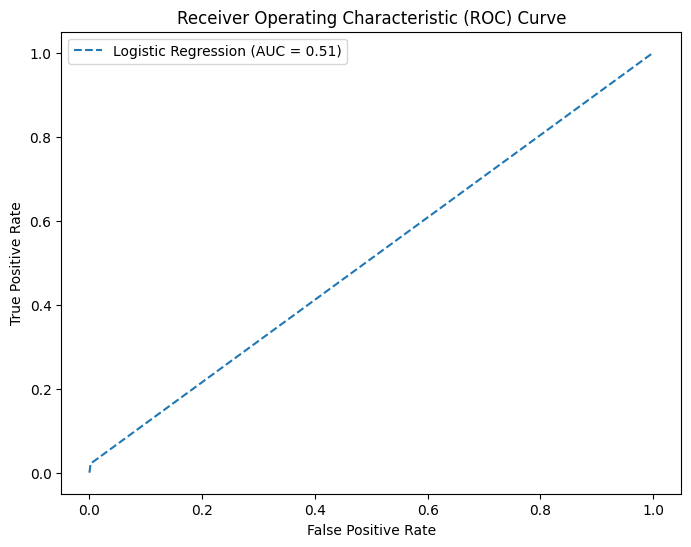

In [79]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_test = lr.predict(X_test) #훈련한 값을 X-test에 predict

fpr, tpr, _ = roc_curve(y_test, y_pred_test)
lr_auc = roc_auc_score(y_test, y_pred_test)

# 모델 성능평가
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_test))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='Logistic Regression (AUC = %0.2f)' % lr_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


Logistic Regression Accuracy: 0.71
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     85101
           1       0.19      0.78      0.30      7556

    accuracy                           0.71     92657
   macro avg       0.58      0.74      0.56     92657
weighted avg       0.91      0.71      0.77     92657



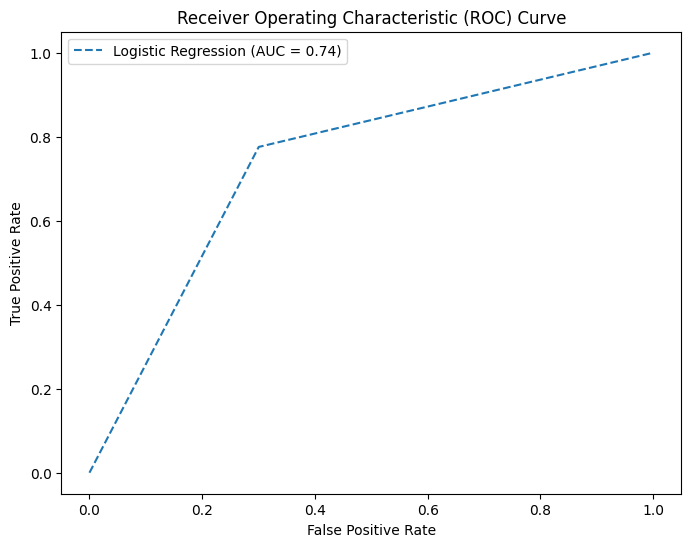

In [112]:
lr = LogisticRegression(random_state=13, class_weight='balanced')
lr.fit(X_train, y_train)

y_pred_test = lr.predict(X_test) #훈련한 값을 X-test에 predict

fpr, tpr, _ = roc_curve(y_test, y_pred_test)
lr_auc = roc_auc_score(y_test, y_pred_test)

# 모델 성능평가
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_test))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='Logistic Regression (AUC = %0.2f)' % lr_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Logistic Regression Accuracy: 0.71
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     85101
           1       0.19      0.78      0.30      7556

    accuracy                           0.71     92657
   macro avg       0.58      0.74      0.56     92657
weighted avg       0.91      0.71      0.77     92657



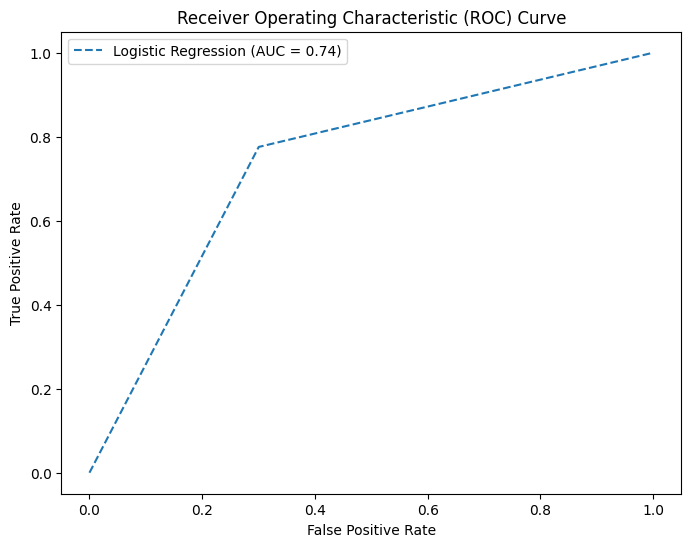

In [59]:
# test 0.3
lr = LogisticRegression(random_state=13, class_weight='balanced')
lr.fit(X_train, y_train)

y_pred_test = lr.predict(X_test) #훈련한 값을 X-test에 predict

fpr, tpr, _ = roc_curve(y_test, y_pred_test)
lr_auc = roc_auc_score(y_test, y_pred_test)

# 모델 성능평가
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_test))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='Logistic Regression (AUC = %0.2f)' % lr_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### DecisionTree

Decision Tree Classifier Accuracy: 0.86
Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     56774
           1       0.19      0.22      0.21      4997

    accuracy                           0.86     61771
   macro avg       0.56      0.57      0.56     61771
weighted avg       0.87      0.86      0.87     61771



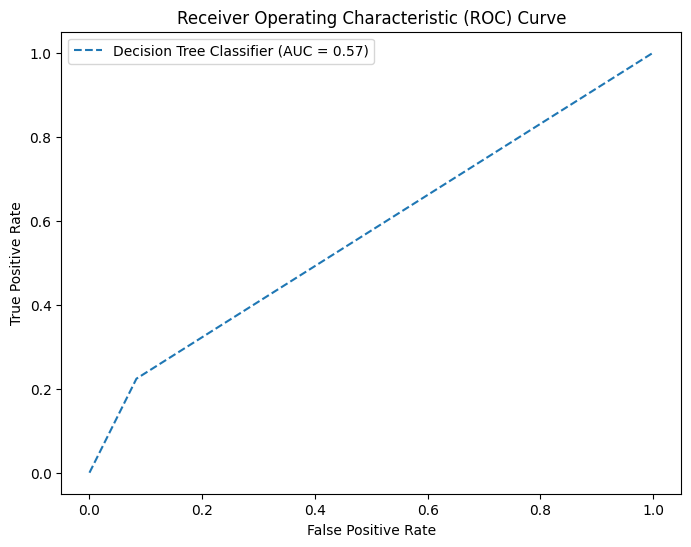

In [81]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

dt_auc = roc_auc_score(y_test, dt_pred)

fpr, tpr, _ = roc_curve(y_test, dt_pred)

accuracy = accuracy_score(y_test, dt_pred)

print(f"Decision Tree Classifier Accuracy: {accuracy:.2f}")
print("Decision Tree Classifier Classification Report:")
print(classification_report(y_test, dt_pred))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='Decision Tree Classifier (AUC = %0.2f)' % dt_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Decision Tree Classifier Accuracy: 0.86
Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     85101
           1       0.19      0.22      0.21      7556

    accuracy                           0.86     92657
   macro avg       0.56      0.57      0.57     92657
weighted avg       0.87      0.86      0.87     92657



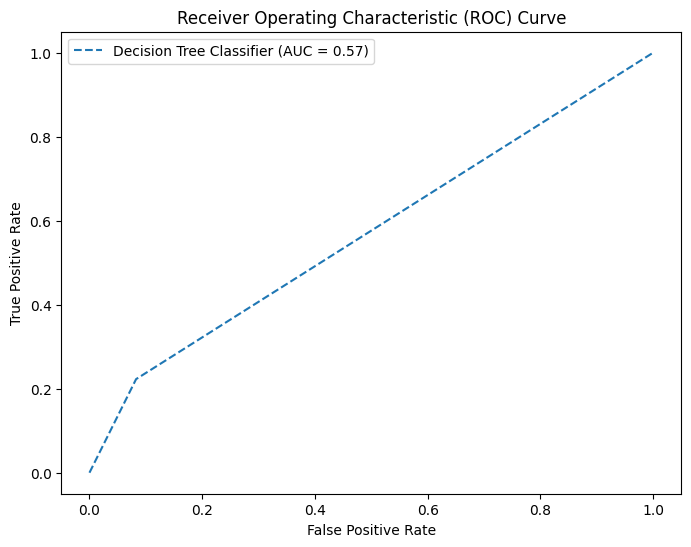

In [60]:
# test 0.3
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

dt_auc = roc_auc_score(y_test, dt_pred)

fpr, tpr, _ = roc_curve(y_test, dt_pred)

accuracy = accuracy_score(y_test, dt_pred)

print(f"Decision Tree Classifier Accuracy: {accuracy:.2f}")
print("Decision Tree Classifier Classification Report:")
print(classification_report(y_test, dt_pred))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='Decision Tree Classifier (AUC = %0.2f)' % dt_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

라벨1에 대한 데이터가 좋지않다

### Random Forest

In [ ]:
rf_model = RandomForestClassifier(random_state=100)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

rf_auc = roc_auc_score(y_test, rf_predictions)

fpr, tpr, _ = roc_curve(y_test, rf_predictions)

accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Classifier Accuracy: {accuracy:.2f}")
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, rf_predictions))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='Random Forest Classifier (AUC = %0.2f)' % rf_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Random Forest Classifier Accuracy: 0.92
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56774
           1       0.41      0.03      0.05      4997

    accuracy                           0.92     61771
   macro avg       0.67      0.51      0.51     61771
weighted avg       0.88      0.92      0.88     61771



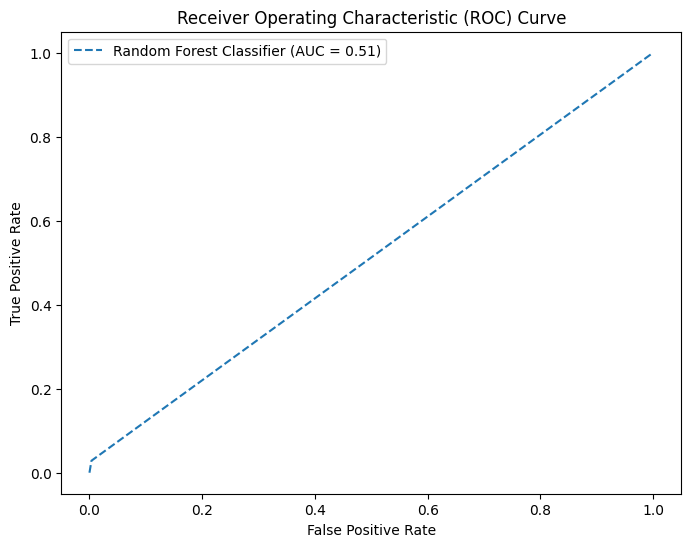

In [82]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

rf_auc = roc_auc_score(y_test, rf_predictions)

fpr, tpr, _ = roc_curve(y_test, rf_predictions)

accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Classifier Accuracy: {accuracy:.2f}")
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, rf_predictions))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='Random Forest Classifier (AUC = %0.2f)' % rf_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Random Forest Classifier Accuracy: 0.92
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     85101
           1       0.44      0.03      0.06      7556

    accuracy                           0.92     92657
   macro avg       0.68      0.51      0.51     92657
weighted avg       0.88      0.92      0.88     92657



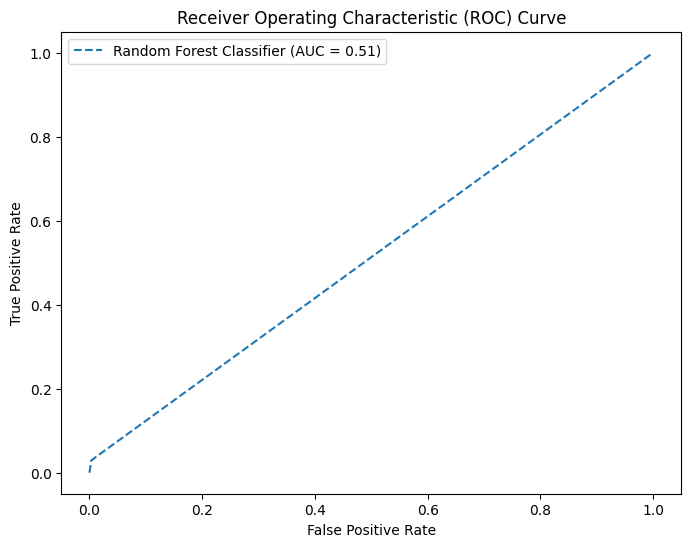

In [61]:
# test 0.3
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_auc = roc_auc_score(y_test, rf_pred)

fpr, tpr, _ = roc_curve(y_test, rf_pred)

accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Classifier Accuracy: {accuracy:.2f}")
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, rf_pred))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='Random Forest Classifier (AUC = %0.2f)' % rf_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

초큼 올랏네

### XGBoost

Fit time :  64.1496114730835
Random Forest Classifier Accuracy: 0.92
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56774
           1       0.52      0.05      0.09      4997

    accuracy                           0.92     61771
   macro avg       0.72      0.52      0.52     61771
weighted avg       0.89      0.92      0.89     61771



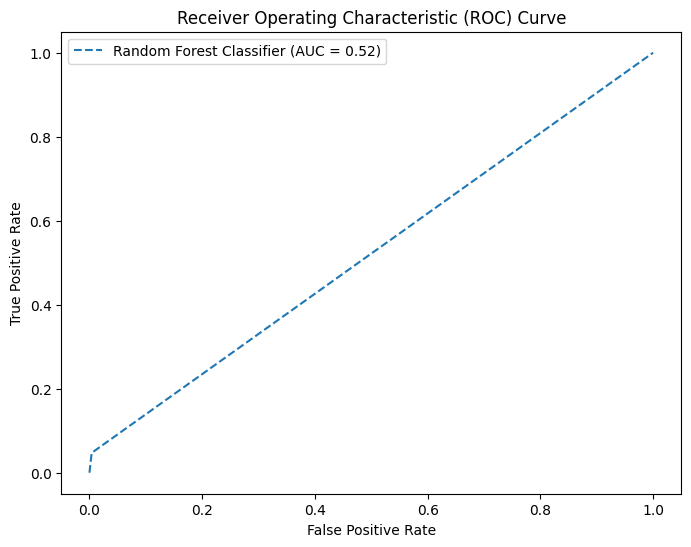

CPU times: total: 2min 56s
Wall time: 1min 5s


In [89]:
%%time

from xgboost import XGBClassifier

start_time = time.time()
xgb = XGBClassifier(n_estimators = 400, learning_rate=0.1, max_depth=3)
xgb.fit(X_train.values, y_train)
print('Fit time : ', time.time() - start_time)

xg_pred = xgb.predict(X_test)

rf_auc = roc_auc_score(y_test, xg_pred)

fpr, tpr, _ = roc_curve(y_test, xg_pred)

accuracy = accuracy_score(y_test, xg_pred)
print(f"Random Forest Classifier Accuracy: {accuracy:.2f}")
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, xg_pred))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='Random Forest Classifier (AUC = %0.2f)' % rf_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Fit time :  136.1579189300537
Random Forest Classifier Accuracy: 0.92
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56774
           1       0.51      0.05      0.09      4997

    accuracy                           0.92     61771
   macro avg       0.72      0.52      0.53     61771
weighted avg       0.89      0.92      0.89     61771



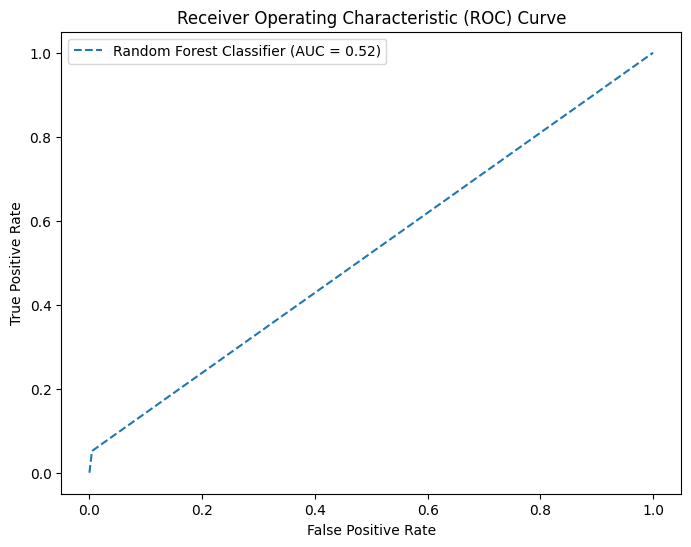

CPU times: total: 7min
Wall time: 2min 17s


In [90]:
%%time

from xgboost import XGBClassifier

start_time = time.time()
xgb = XGBClassifier(n_estimators = 1000, learning_rate=0.1, max_depth=3)
xgb.fit(X_train.values, y_train)
print('Fit time : ', time.time() - start_time)

xg_pred = xgb.predict(X_test)

rf_auc = roc_auc_score(y_test, xg_pred)

fpr, tpr, _ = roc_curve(y_test, xg_pred)

accuracy = accuracy_score(y_test, xg_pred)
print(f"Random Forest Classifier Accuracy: {accuracy:.2f}")
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, xg_pred))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='Random Forest Classifier (AUC = %0.2f)' % rf_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Fit time :  138.00315690040588
Random Forest Classifier Accuracy: 0.92
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56774
           1       0.50      0.05      0.09      4997

    accuracy                           0.92     61771
   macro avg       0.71      0.52      0.52     61771
weighted avg       0.89      0.92      0.89     61771



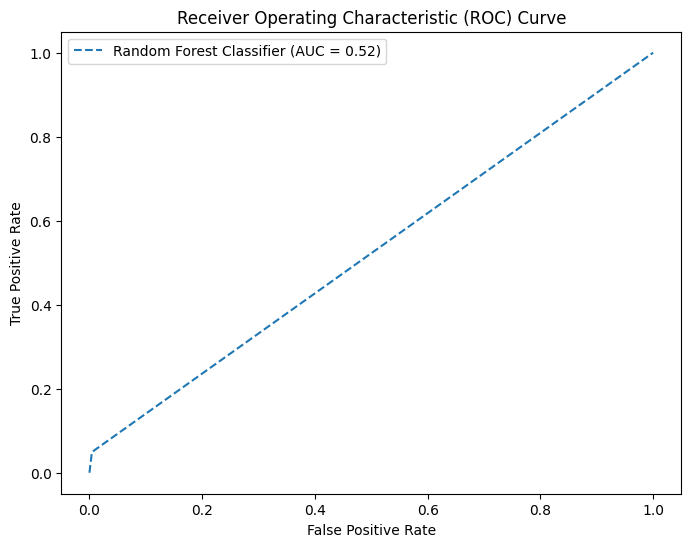

CPU times: total: 5min 33s
Wall time: 2min 18s


In [91]:
%%time

from xgboost import XGBClassifier

start_time = time.time()
xgb = XGBClassifier(n_estimators = 400, learning_rate=0.1, max_depth=6)
xgb.fit(X_train.values, y_train)
print('Fit time : ', time.time() - start_time)

xg_pred = xgb.predict(X_test)

rf_auc = roc_auc_score(y_test, xg_pred)

fpr, tpr, _ = roc_curve(y_test, xg_pred)

accuracy = accuracy_score(y_test, xg_pred)
print(f"Random Forest Classifier Accuracy: {accuracy:.2f}")
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, xg_pred))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='Random Forest Classifier (AUC = %0.2f)' % rf_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Random Forest Classifier Accuracy: 0.92
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     85101
           1       0.53      0.05      0.09      7556

    accuracy                           0.92     92657
   macro avg       0.73      0.52      0.52     92657
weighted avg       0.89      0.92      0.89     92657



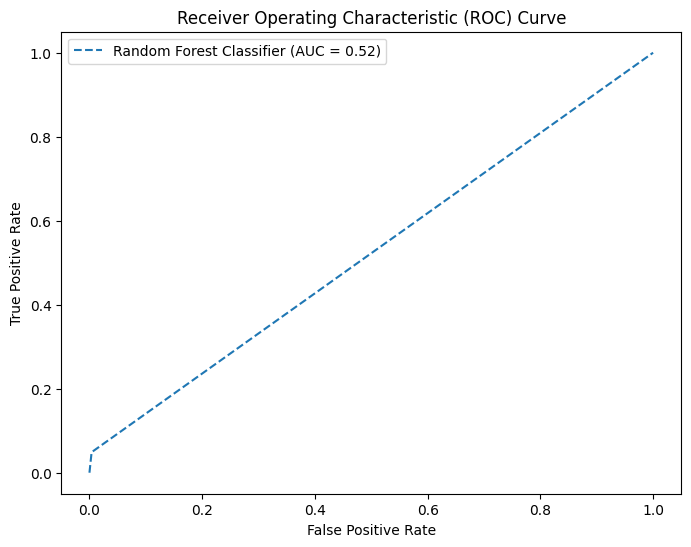

In [62]:
# test 0.3


from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 400, learning_rate=0.1, max_depth=3)
xgb.fit(X_train.values, y_train)

xg_pred = xgb.predict(X_test)

rf_auc = roc_auc_score(y_test, xg_pred)

fpr, tpr, _ = roc_curve(y_test, xg_pred)

accuracy = accuracy_score(y_test, xg_pred)
print(f"Random Forest Classifier Accuracy: {accuracy:.2f}")
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, xg_pred))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='Random Forest Classifier (AUC = %0.2f)' % rf_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

이거도 초큼 올랏넹

### LGBM

In [48]:
from lightgbm import LGBMClassifier

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest Classifier Accuracy: 0.92
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56774
           1       0.49      0.04      0.07      4997

    accuracy                           0.92     61771
   macro avg       0.71      0.52      0.52     61771
weighted avg       0.89      0.92      0.89     61771



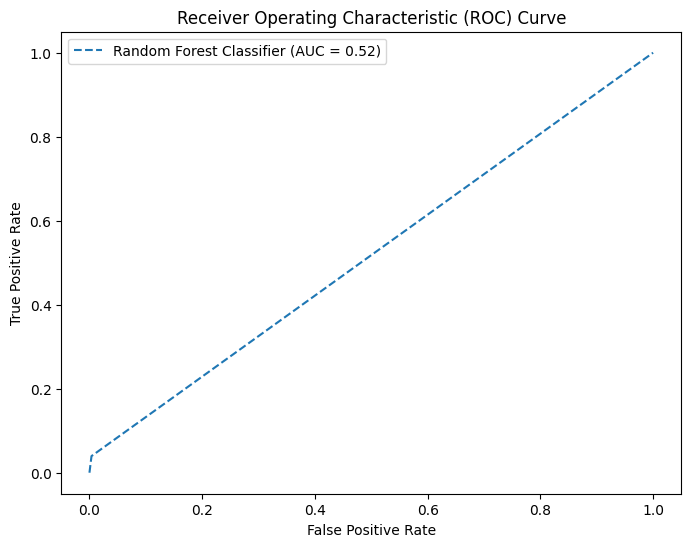

In [107]:
lgbm = LGBMClassifier(n_estimators = 400)
lgbm.fit(X_train, y_train)


lg_pred = lgbm.predict(X_test)

lg_auc = roc_auc_score(y_test, lg_pred)

fpr, tpr, _ = roc_curve(y_test, lg_pred)

accuracy = accuracy_score(y_test, lg_pred)
print(f"Random Forest Classifier Accuracy: {accuracy:.2f}")
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, lg_pred))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='Random Forest Classifier (AUC = %0.2f)' % lg_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Random Forest Classifier Accuracy: 0.92
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     85101
           1       0.50      0.04      0.08      7556

    accuracy                           0.92     92657
   macro avg       0.71      0.52      0.52     92657
weighted avg       0.89      0.92      0.89     92657



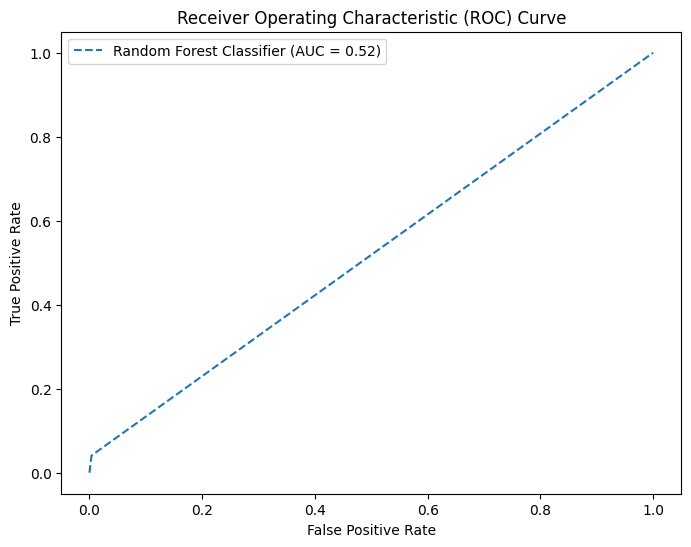

In [63]:
# test 0.3
lgbm = LGBMClassifier(n_estimators = 400)
lgbm.fit(X_train, y_train)


lg_pred = lgbm.predict(X_test)

lg_auc = roc_auc_score(y_test, lg_pred)

fpr, tpr, _ = roc_curve(y_test, lg_pred)

accuracy = accuracy_score(y_test, lg_pred)
print(f"Random Forest Classifier Accuracy: {accuracy:.2f}")
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, lg_pred))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='Random Forest Classifier (AUC = %0.2f)' % lg_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

이것도 0.3이 조금 더 높네


In [113]:
params = {
    'C' : [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter' : [100,1000]
}

grid_cv = GridSearchCV(lr, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,3.961907,0.008472,0.110196,0.014466,0.001,100,"{'C': 0.001, 'max_iter': 100}",0.696093,0.697293,0.696693,0.000600,12
1,12.396328,0.651756,0.084275,0.016456,0.001,1000,"{'C': 0.001, 'max_iter': 1000}",0.700959,0.702002,0.701481,0.000521,9
2,3.769414,0.039396,0.089760,0.011969,0.01,100,"{'C': 0.01, 'max_iter': 100}",0.698212,0.698931,0.698571,0.000359,11
3,13.580659,2.265936,0.076296,0.001497,0.01,1000,"{'C': 0.01, 'max_iter': 1000}",0.707823,0.709134,0.708479,0.000655,5
4,4.618639,0.217417,0.140124,0.039394,0.1,100,"{'C': 0.1, 'max_iter': 100}",0.703105,0.705730,0.704418,0.001312,8
5,17.525607,0.596904,0.089257,0.014460,0.1,1000,"{'C': 0.1, 'max_iter': 1000}",0.708452,0.709865,0.709159,0.000706,4
6,3.675664,0.170044,0.090759,0.019946,1,100,"{'C': 1, 'max_iter': 100}",0.705141,0.705277,0.705209,0.000068,7
7,15.121037,0.795371,0.111700,0.005983,1,1000,"{'C': 1, 'max_iter': 1000}",0.708452,0.710013,0.709233,0.000780,2
8,3.835735,0.047872,0.074799,0.004987,10,100,"{'C': 10, 'max_iter': 100}",0.703476,0.697839,0.700657,0.002818,10
9,13.765165,1.061160,0.095746,0.013964,10,1000,"{'C': 10, 'max_iter': 1000}",0.708415,0.710032,0.709224,0.000808,3


In [114]:
params = {
    'C' : [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter' : [100,1000]
}

grid_cv = GridSearchCV(lr, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(X_train, y_train)

cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.614972,0.163056,0.058842,0.008809,0.001,100,"{'C': 0.001, 'max_iter': 100}",0.694155,0.699387,0.700104,0.697882,0.002651,12
1,17.738533,1.190669,0.056848,0.014314,0.001,1000,"{'C': 0.001, 'max_iter': 1000}",0.701579,0.704493,0.703740,0.703271,0.001235,7
2,5.802805,0.160019,0.082780,0.021898,0.01,100,"{'C': 0.01, 'max_iter': 100}",0.699262,0.704216,0.700923,0.701467,0.002059,8
3,19.486854,1.075784,0.058512,0.019102,0.01,1000,"{'C': 0.01, 'max_iter': 1000}",0.707074,0.709766,0.709290,0.708710,0.001173,5
4,5.499950,0.422084,0.063167,0.016499,0.1,100,"{'C': 0.1, 'max_iter': 100}",0.698568,0.704493,0.696496,0.699852,0.003389,11
5,22.459167,1.312938,0.079121,0.005236,0.1,1000,"{'C': 0.1, 'max_iter': 1000}",0.707282,0.710321,0.709748,0.709117,0.001318,4
6,6.515661,0.601263,0.112033,0.040505,1,100,"{'C': 1, 'max_iter': 100}",0.698651,0.706588,0.705308,0.703516,0.003479,6
7,20.795694,5.416845,0.064161,0.012196,1,1000,"{'C': 1, 'max_iter': 1000}",0.707393,0.710501,0.709956,0.709284,0.001355,1
8,6.234402,0.908926,0.068482,0.005541,10,100,"{'C': 10, 'max_iter': 100}",0.694377,0.704327,0.703837,0.700847,0.004579,9
9,22.643493,3.049948,0.083125,0.011095,10,1000,"{'C': 10, 'max_iter': 1000}",0.707352,0.710390,0.709887,0.709210,0.001330,3


In [ ]:
params = {
    'max_depth': [4, 6, 8, 10],
    'n_estimators': [50, 100, 200],
    'min_samples_leaf': [8, 12],
    'min_samples_split': [8, 12]
}

grid_cv = GridSearchCV(rf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train_scaled, y_train)

cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df

In [136]:
cv_results_df.sort_values(by=['rank_test_score'], ascending=[True])[:3]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
47,63.084690,0.052360,6.935939,0.058343,10,12,12,200,"{'max_depth': 10, 'min_samples_leaf': 12, 'min...",0.919435,0.919471,0.919453,0.000018,1
44,99.485382,0.160569,10.275504,0.074799,10,12,8,200,"{'max_depth': 10, 'min_samples_leaf': 12, 'min...",0.919435,0.919471,0.919453,0.000018,1
20,67.102437,0.168548,9.140042,0.096242,6,12,8,200,"{'max_depth': 6, 'min_samples_leaf': 12, 'min_...",0.919444,0.919453,0.919448,0.000004,3


In [ ]:
params = {
    'max_depth': [4, 6, 8, 10],
    'n_estimators': [50, 100, 200],
    'min_samples_leaf': [8, 12],
    'min_samples_split': [8, 12]
}

grid_cv = GridSearchCV(rf, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(X_train_scaled, y_train)

cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df

In [139]:
cv_results_df.sort_values(by=['rank_test_score'], ascending=[True])[:3]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
33,35.968320,1.485210,1.840742,0.026165,8,12,12,50,"{'max_depth': 8, 'min_samples_leaf': 12, 'min_...",0.919463,0.919449,0.919448,0.919453,6.820030e-06,1
30,38.146768,3.705725,1.919533,0.190091,8,12,8,50,"{'max_depth': 8, 'min_samples_leaf': 12, 'min_...",0.919463,0.919449,0.919448,0.919453,6.820030e-06,1
0,19.034734,0.529938,1.251652,0.024035,4,8,8,50,"{'max_depth': 4, 'min_samples_leaf': 8, 'min_s...",0.919449,0.919449,0.919448,0.919448,5.269157e-07,3


In [ ]:
params={
    'n_estimators' : [100,200,300,400,500],
    'learning_rate' : [0.01,0.05,0.1],
    'max_depth' : [3,5,10]
}

grid_cv = GridSearchCV(xgb, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train_scaled, y_train)

cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df

In [141]:
cv_results_df.sort_values(by=['rank_test_score'], ascending=[True])[:3]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
16,55.834141,0.047755,0.727056,0.041889,0.05,3,200,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",0.920120,0.919786,0.919953,0.000167,1
9,322.213835,1.706929,4.339887,0.001496,0.01,5,500,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.920064,0.919776,0.919920,0.000144,2
20,53.919877,1.137956,0.780910,0.021941,0.05,5,100,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",0.920027,0.919786,0.919906,0.000121,3


In [ ]:
params={
    'n_estimators' : [100,200,300,400,500],
    'learning_rate' : [0.01,0.05,0.1],
    'max_depth' : [3,5,10]
}

grid_cv = GridSearchCV(xgb, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(X_train_scaled, y_train)

cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df

In [ ]:
cv_results_df.sort_values(by=['rank_test_score'], ascending=[True])[:3]

In [ ]:
params = {
    'n_estimators': [200, 1000, 2000, 3000],
    'num_leaves': [32, 64, 128]
}

grid_cv = GridSearchCV(lgbm, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train_scaled, y_train)

cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df

In [143]:
cv_results_df.sort_values(by=['rank_test_score'], ascending=[True])[:3]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_num_leaves,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,9.445226,0.889121,5.161688,0.074302,200,32,"{'n_estimators': 200, 'num_leaves': 32}",0.919305,0.919221,0.919263,0.000042,1
1,10.980119,0.935995,5.897221,0.199464,200,64,"{'n_estimators': 200, 'num_leaves': 64}",0.919009,0.918592,0.918801,0.000209,2
2,11.678250,0.044382,6.592360,0.065824,200,128,"{'n_estimators': 200, 'num_leaves': 128}",0.918149,0.917973,0.918061,0.000088,3


In [ ]:
params = {
    'n_estimators': [200, 1000, 2000, 3000],
    'num_leaves': [32, 64, 128]
}

grid_cv = GridSearchCV(lgbm, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(X_train_scaled, y_train)

cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df

In [145]:
cv_results_df.sort_values(by=['rank_test_score'], ascending=[True])[:3]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_num_leaves,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,12.307734,1.807759,3.280555,0.272627,200,32,"{'n_estimators': 200, 'num_leaves': 32}",0.919421,0.919699,0.919475,0.919532,0.000120,1
1,12.684058,1.245622,3.747972,0.128321,200,64,"{'n_estimators': 200, 'num_leaves': 64}",0.919227,0.919518,0.919129,0.919291,0.000165,2
2,15.667395,1.266374,4.358671,0.097489,200,128,"{'n_estimators': 200, 'num_leaves': 128}",0.918422,0.918963,0.918643,0.918676,0.000222,3


In [ ]:
# target_col = ['rank_test_score', 'mean_test_score', 'param_n_estimators', 'param_learning_rate', 'param_max_depth']

# cv_results_df[target_col].sort_values('rank_test_score').head()

In [156]:
result

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.705883,0.186549,0.775675,0.300765,0.737681
DecisionTree,0.860626,0.192986,0.222869,0.206854,0.570060
RandomForest,0.917815,0.441584,0.029513,0.055328,0.513100
XGBoost,0.918948,0.533237,0.048835,0.089476,0.522520
LightGBM,0.918409,0.496795,0.041027,0.075795,0.518669


---

### SMOTE 적용

In [53]:
# SMOTE 적용(knn기법)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)


In [54]:
X_train.shape, y_train.shape

((216197, 18), (216197,))

In [55]:
X_train_over.shape, y_train_over.shape

((397564, 18), (397564,))

In [86]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_train_over, return_counts=True))

(array([0, 1]), array([198782,  17415], dtype=int64))
(array([0, 1]), array([198782, 198782], dtype=int64))


In [88]:
def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)

    return acc, pre, re, f1, auc

def get_result(model, X_train, y_train, X_test, y_test):
     model.fit(X_train, y_train)
     pred = model.predict(X_test)

     return get_clf_eval(y_test, pred)

from sklearn.metrics import confusion_matrix

def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    tmp = []

    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))

    return pd.DataFrame(tmp, columns=col_names, index=model_names)

In [89]:
models = [lr, dt, rf, xgb, lgbm]
model_names = ['LogisticReg.', 'DecisionTree', 'RandomForest', 'XGBoost','LightGBM']

start_time = time.time()
results = get_result_pd(models, model_names, X_train_over, y_train_over, X_test, y_test)

print('Fit time : ', time.time() - start_time)
results

Fit time :  484.48788118362427


,accuracy,precision,recall,f1,roc_auc
LogisticReg.,0.720215,0.169688,0.624404,0.266855,0.676563
DecisionTree,0.827612,0.170774,0.288909,0.214661,0.582176
RandomForest,0.881261,0.234187,0.200900,0.216270,0.571285
XGBoost,0.898583,0.288828,0.166623,0.211330,0.565098
LightGBM,0.912397,0.358548,0.094097,0.149072,0.539575
